<a href="https://colab.research.google.com/github/brian-lear/bootcamp_alura/blob/main/Brian_Lear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Olá **Cientista**!

Bem vinda e bem vindo ao **mega desafio do Módulo 01**, neste desafio queremos que você aplique tudo que aprendeu no curso, analisando uma outra informação ~~referente a base de dados de [produção hospitalar](http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi), seja número de internação, óbito, AIH ou taxa de mortalidade.~~ 

**P.S: Infelizmente o DataSUS está fora do ar por tempo indeterminado, para você não parar seu projeto, adicionamos no [GitHub](https://github.com/alura-cursos/agendamento-hospitalar/tree/main/dados) do curso, duas novas bases para você utilizar neste projeto (COVID-19 e Óbitos).**

Uma base é dos **casos de COVID-19 baixadas do projeto [BRASIL.IO](https://brasil.io/dataset/covid19/caso/)**, outra são os números de óbitos registrados no cartório civil desde 1970 retirado do **[Kaggle](https://www.kaggle.com/amandalk/registered-deaths-brazil)**.

Vocês podem escolher qualquer uma das duas bases de dados, a de COVID-19 é mais desafiadora e você vai precisar descompactar o arquivo por ser grande e entrar no site do Brasil.IO para entender todas as features presentes (No Brasil.IO tem diversas bases sobre COVID-19, estamos usando a chamada **Casos**). A base de óbito é mais simples e relativamente semelhate a utilizada no curso.

Algumas dicas para você mandar bem no desafio final, capriche nas análises, escreva suas conclusões e hipóteses (mesmo que resultado seja inconclusivo) e não esqueça de colocar um resumo dos pontos que julgar mais interessantes do seu projeto.



E para que o seu projeto tenha a oportunidade de ser avalido pelo Thiago G. Santos e Átila Iamarino, ao vivo na **live de revisão de projetos** submeta o link compartilhado do seu notebook [neste formulário](https://docs.google.com/forms/d/e/1FAIpQLSd1jemhvdo8sM6e-bgOryyZ2P3YuMO6E_mUQXabyBX_xhuZQQ/viewform?usp=sf_link) até dia 22/11 às 23h59.

Para facilitar a vida dos seus instrutores favoritos, no momento da correção, algumas dicas de como estruturar seu projeto:

- Como título do seu **Colab** coloque seu nome (Ex: Thiago_Gonçalves.ipynb)
- Crie um resumo das suas análises na parte superior do notebook
- Informe no resumo os dados que vc vai analisar (Ex: Finaceiros e Internações)

Qualquer dúvida não deixe de perguntar no Discord, compatilhe seu projeto nas redes sociais e crie um repositório no github, esse é o início do seu portifólio em Data Science.



Fique a vontade para utilizar esse notebook como template projeto.



## **Resumo:**

Analisando a cidade de São Paulo, e comparando-a com outras cidades do Brasil, podemos ver que mesmo ela apresentando valores absolutos maiores de confirmados e mortes, ela se encontra relativamente melhor que outras cidades populosas do Brasil.

Para analisar esse fato, usei a métrica de Mortalidade por 100k habitantes, fazendo com que as cidades tivessem uma base comparativa mais justa entre elas. No universo de cidades que tenham mais de 1 milhão de habitantes e mais de 10 mil casos confirmados, a cidade de São Paulo se encontra em 5º lugar, com 0.04, enquanto o primeiro lugar, Rio de Janeiro, tem uma taxa de 0.11, mais que o dobro de São Paulo.

Com esta análise não conseguimos identificar os motivos por trás dessa mortalidade, mas fatores como políticas públicas (como fechamento de comércio, parques e escolas), isolamento social da população e uso de máscaras (o que limitaria a exposição e levaria a uma carga viral menor nos casos confirmados), e uma infraestrutura hospitalar melhor (o que levaria a mais casos de sucesso no tratamento da doença), são alguns dos fatores que poderiam explicar essa diferença.

## Preparando os dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [ ]:
# usei a base de 'caso.csv' do brasil.io

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/caso.csv')
df.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-05,AC,NaN,state,31248,697,234,True,881935.0,894470.0,12.0,3493.46540,0.0223
1,2020-11-04,AC,NaN,state,31218,696,233,False,881935.0,894470.0,12.0,3490.11146,0.0223
2,2020-11-03,AC,NaN,state,30962,695,232,False,881935.0,894470.0,12.0,3461.49116,0.0224
3,2020-11-02,AC,NaN,state,30954,693,231,False,881935.0,894470.0,12.0,3460.59678,0.0224
4,2020-11-01,AC,NaN,state,30951,693,230,False,881935.0,894470.0,12.0,3460.26138,0.0224


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['week_number'] = df['date'].dt.isocalendar().week
df['week_number']

0         45
1         45
2         45
3         45
4         44
          ..
936865    26
936866    26
936867    25
936868    25
936869    25
Name: week_number, Length: 936870, dtype: UInt32

In [ ]:
# Criando a coluna de Semana, para facilitar a visualização dos Plots

df['date'] = pd.to_datetime(df['date'])
df['week_number'] = df['date'].dt.isocalendar().week

# criando uma nova métrica, mortalidade por 100k habitantes.

df['deaths_per_100k_inhabitants'] = df['deaths'] * 100000 / df['estimated_population']
df['death_rate_per_100k_inhabitants'] = df['deaths_per_100k_inhabitants'] / df['confirmed_per_100k_inhabitants']

df.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,week_number,deaths_per_100k_inhabitants,death_rate_per_100k_inhabitants
0,2020-11-05,AC,NaN,state,31248,697,234,True,881935.0,894470.0,12.0,3493.46540,0.0223,45,77.923239,0.022305
1,2020-11-04,AC,NaN,state,31218,696,233,False,881935.0,894470.0,12.0,3490.11146,0.0223,45,77.811441,0.022295
2,2020-11-03,AC,NaN,state,30962,695,232,False,881935.0,894470.0,12.0,3461.49116,0.0224,45,77.699643,0.022447
3,2020-11-02,AC,NaN,state,30954,693,231,False,881935.0,894470.0,12.0,3460.59678,0.0224,45,77.476047,0.022388
4,2020-11-01,AC,NaN,state,30951,693,230,False,881935.0,894470.0,12.0,3460.26138,0.0224,44,77.476047,0.022390


In [ ]:
# Criando uma coluna das regiões do Brasil

df.loc[(df['state']=='AC')|(df['state']=='AP')|(df['state']=='AM')|(df['state']=='PA')|(df['state']=='RO')|(df['state']=='RR')|(df['state']=='TO'),'region'] = 'N'
df.loc[(df['state']=='AL')|(df['state']=='BA')|(df['state']=='CE')|(df['state']=='MA')|(df['state']=='PB')|(df['state']=='PE')|(df['state']=='PI')|(df['state']=='RN')|(df['state']=='SE'),'region'] = 'NE'
df.loc[(df['state']=='DF')|(df['state']=='GO')|(df['state']=='MS')|(df['state']=='MT'),'region'] = 'CO'
df.loc[(df['state']=='ES')|(df['state']=='MG')|(df['state']=='RJ')|(df['state']=='SP'),'region'] = 'SE'
df.loc[(df['state']=='PR')|(df['state']=='SC')|(df['state']=='RS'),'region'] = 'S'

In [ ]:
# Criando um dataframe contendo somente as informações mais recentes por UF, tendo assim uma foto do dado mais atual

df_states_current = df[(df['is_last']==True) & (df['place_type']=='state')][['state','confirmed','deaths','estimated_population','confirmed_per_100k_inhabitants','death_rate','region','deaths_per_100k_inhabitants','death_rate_per_100k_inhabitants']]
df_states_current.index = df_states_current['state']
df_states_current = df_states_current.drop(columns=['state'])

df_states_current = df_states_current.sort_values(['death_rate_per_100k_inhabitants'],ascending = False)
df_states_current.head()

,confirmed,deaths,estimated_population,confirmed_per_100k_inhabitants,death_rate,region,deaths_per_100k_inhabitants,death_rate_per_100k_inhabitants
state,,,,,,,,
RJ,313843,20849,17366189.0,1807.20710,0.0664,SE,120.055126,0.066431
PE,164222,8687,9616621.0,1707.68922,0.0529,NE,90.333185,0.052898
SP,1125936,39717,46289333.0,2432.38761,0.0353,SE,85.801625,0.035275
CE,277072,9392,9187103.0,3015.87998,0.0339,NE,102.230268,0.033897
RN,82420,2603,3534165.0,2332.09259,0.0316,NE,73.652475,0.031582


In [ ]:
# Criando um dataframe contendo somente as informações mais recentes por Região, tendo assim uma foto do dado mais atual

df_region_current = df_states_current.copy()
df_region_current.index = df_region_current['region']
df_region_current = df_region_current.groupby(df_region_current.index).sum()

# recalculando a métrica mortalidade por 100k habitantes para ter o valor por Região

df_region_current['confirmed_per_100k_inhabitants'] = df_region_current['confirmed'] * 100000 / df_region_current['estimated_population']
df_region_current['death_rate'] = df_region_current['deaths'] / df_region_current['confirmed']

df_region_current['deaths_per_100k_inhabitants'] = df_region_current['deaths'] * 100000 / df_region_current['estimated_population']
df_region_current['death_rate_per_100k_inhabitants'] = df_region_current['deaths_per_100k_inhabitants'] / df_region_current['confirmed_per_100k_inhabitants']

df_region_current = df_region_current.sort_values(['death_rate_per_100k_inhabitants'],ascending = False)
df_region_current.head()

,confirmed,deaths,estimated_population,confirmed_per_100k_inhabitants,death_rate,deaths_per_100k_inhabitants,death_rate_per_100k_inhabitants
region,,,,,,,
SE,1964133,73590,89012240.0,2206.587543,0.037467,82.674023,0.037467
NE,1495950,42600,57374243.0,2607.354663,0.028477,74.249346,0.028477
N,711398,16107,18672591.0,3809.851563,0.022641,86.260123,0.022641
CO,704348,15122,16504303.0,4267.662803,0.021470,91.624590,0.021470
S,740647,14420,30192315.0,2453.097750,0.019469,47.760498,0.019469


In [ ]:
# Criando um dataframe contendo somente as informações mais recentes por cidade
df_cities_current = df.copy()
df_cities_current = df_cities_current[(df_cities_current['place_type'] == 'city') & (df_cities_current['is_last'] == True)]

df_cities_current = df_cities_current.sort_values('death_rate_per_100k_inhabitants', ascending = False)
df_cities_current.index = df_cities_current['city']

# criando uma coluna 'city_col' para poder tratar cidade como index ou coluna
df_cities_current = df_cities_current.rename(columns={"city": "city_col"})

df_cities_current.head()

,date,state,city_col,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,week_number,deaths_per_100k_inhabitants,death_rate_per_100k_inhabitants,region
city,,,,,,,,,,,,,,,,,
Casa Grande,2020-11-04,MG,Casa Grande,city,2,1,119,True,2257.0,2254.0,3114907.0,88.73114,0.5000,45,44.365572,0.500000,SE
Senador Modestino Gonçalves,2020-11-04,MG,Senador Modestino Gonçalves,city,2,1,144,True,4156.0,4105.0,3165909.0,48.72107,0.5000,45,24.360536,0.500000,SE
Ponte Branca,2020-08-10,MT,Ponte Branca,city,2,1,94,True,1576.0,1550.0,5106703.0,129.03226,0.5000,33,64.516129,0.500000,CO
Cajapió,2020-11-05,MA,Cajapió,city,5,2,214,True,11177.0,11216.0,2102408.0,44.57917,0.4000,45,17.831669,0.400000,NE
Materlândia,2020-11-04,MG,Materlândia,city,3,1,154,True,4459.0,4436.0,3140605.0,67.62849,0.3333,45,22.542831,0.333333,SE


# **EDA**

O objetivo da análise é ver se o fato da cidade de São Paulo ser a primeira em confirmados significa que a situação dela é menos favoravel, se comparado com as outras cidades do Brasil.

Para tanto, analisar por confirmados ou mortes não seria justo, pois por ser mais populosa, a frequência de casos esperada seria naturalmente maior. Logo, a métrica a ser utilizada será a de Mortalidade por 100k habitantes, que seria a divisão dos Mortos por 100k habitantes pelos Confirmados por 100k habitantes.

Isso visa mostrar que, mesmo tendo mais casos absolutos, a cidade de São Paulo possúi um cenário melhor,possivelmente causado por fatores como infraestrutura, políticas públicas, isolamento social, entre outros, se comparado com as outras cidades com 1 milhão de habitantes ou mais, isso sendo refletido na mortalidade por 100k hab. 

## Por Região

Indo do Macro ao Micro, começamos com um panorâma por Região do Brasil. Podemos ver que o Sudeste (SE) é a Região com mais Confirmados, Mortes e Mortalidade por 100k hab, sendo o Centro-Oeste (CO) a região com mais Confirmados por 100k hab.

Será que o SE é puxado por SP, ou será efeito de algum outro estado?

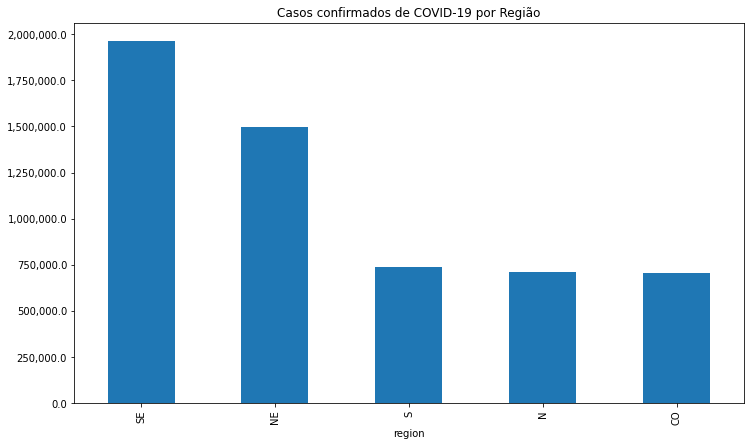

In [ ]:
fig = plt.figure()

df_region_current = df_region_current.sort_values('confirmed',ascending = False)
ax = df_region_current['confirmed'].plot(kind='bar',figsize=(12,7)).yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,}'))

plt.title('Casos confirmados de COVID-19 por Região')
display()

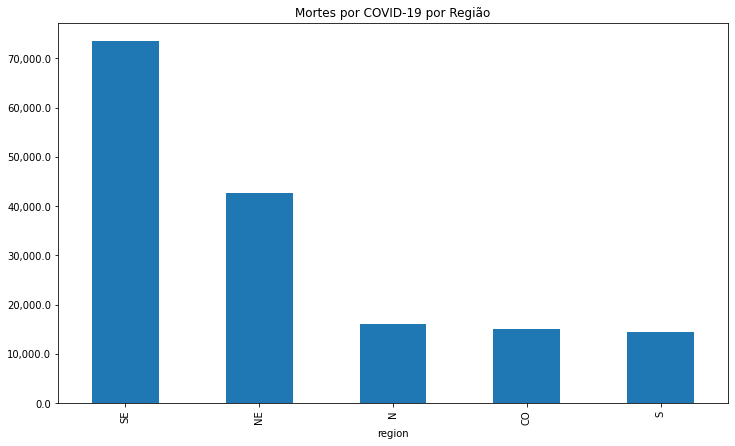

In [ ]:
fig = plt.figure()

df_region_current = df_region_current.sort_values('deaths',ascending = False)
df_region_current['deaths'].plot(kind='bar',figsize=(12,7)).yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,}'))

plt.title('Mortes por COVID-19 por Região')
display()

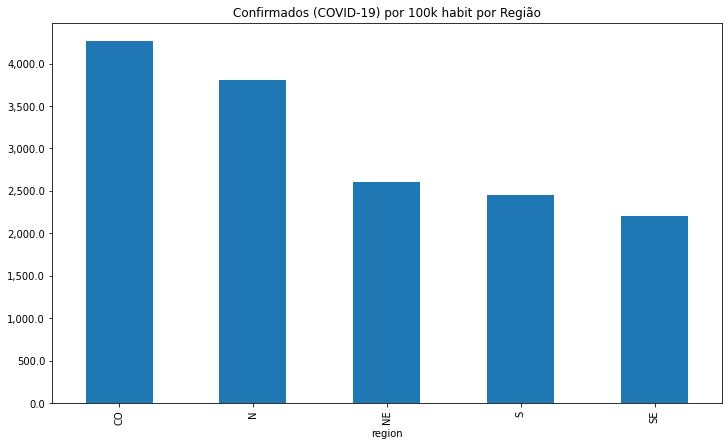

In [ ]:
fig = plt.figure()

df_region_current = df_region_current.sort_values('confirmed_per_100k_inhabitants',ascending = False)
df_region_current['confirmed_per_100k_inhabitants'].plot(kind='bar',figsize=(12,7)).yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,}'))

plt.title('Confirmados (COVID-19) por 100k habit por Região')
display()

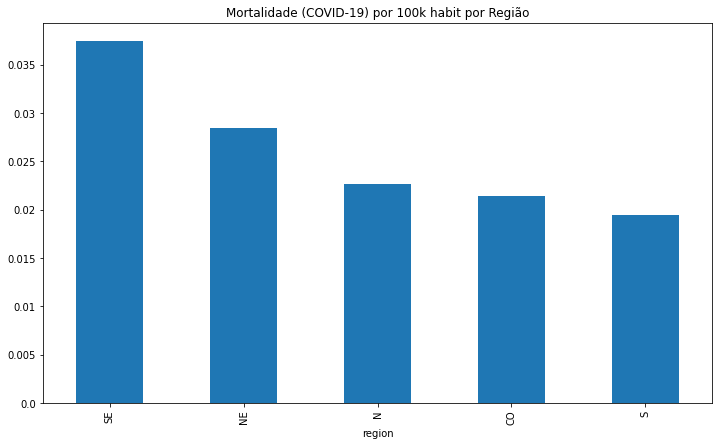

In [ ]:
fig = plt.figure()

df_region_current = df_region_current.sort_values('death_rate_per_100k_inhabitants',ascending = False)
df_region_current['death_rate_per_100k_inhabitants'].plot(kind='bar',figsize=(12,7)).yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,}'))

plt.title('Mortalidade (COVID-19) por 100k habit por Região')
display()

## Por UF

Analisando as UFs, podemos ver que o estado de SP tem o maior número absoluto em Confirmados e Mortes, mas isso já era esperado por conta do tamanho da sua população. 
Porém, podemos ver como ele cai em posições se analisado por Confirmados por 100k hab [20º] ou Mortalidade por 100k hab [3º].
A UF com a maior Mortalidade por 100k hab é o RJ, o que ajuda a explicar a primeira posição da Região SE neste quesito.

Será que o estado de SP é puxado pela cidade de SP, ou será efeito de alguma outra cidade?

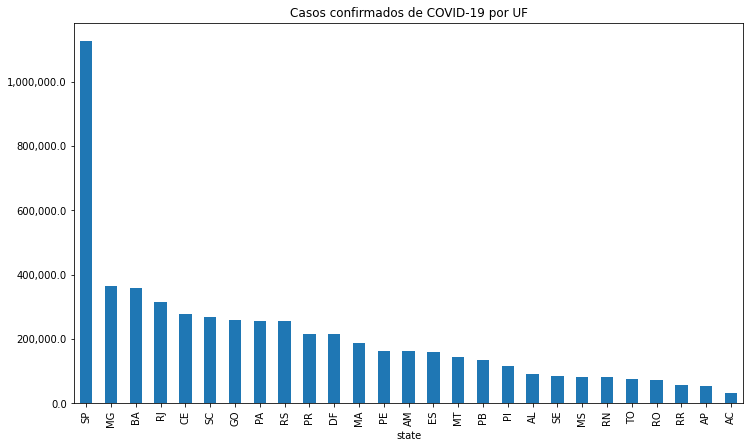

In [ ]:
fig = plt.figure()

df_states_current = df_states_current.sort_values('confirmed',ascending = False)
ax = df_states_current['confirmed'].plot(kind='bar',figsize=(12,7)).yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,}'))

plt.title('Casos confirmados de COVID-19 por UF')
display()

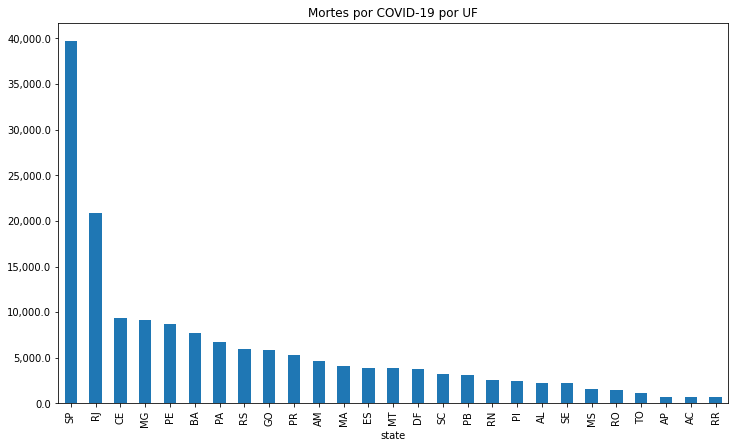

In [ ]:
fig = plt.figure()

df_states_current = df_states_current.sort_values('deaths',ascending = False)
df_states_current['deaths'].plot(kind='bar',figsize=(12,7)).yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,}'))

plt.title('Mortes por COVID-19 por UF')
display()

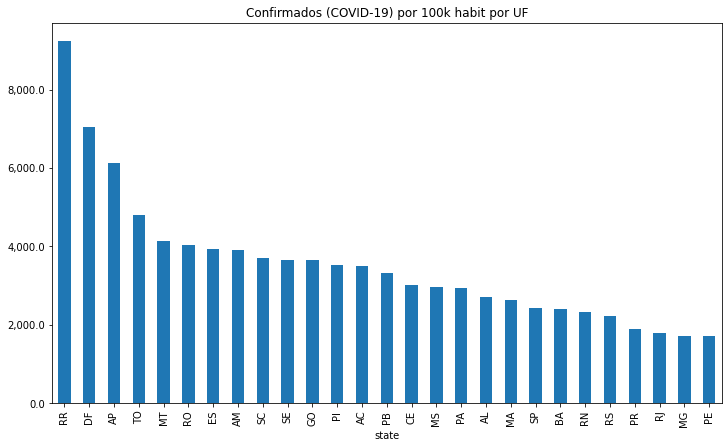

In [ ]:
fig = plt.figure()

df_states_current = df_states_current.sort_values('confirmed_per_100k_inhabitants',ascending = False)
df_states_current['confirmed_per_100k_inhabitants'].plot(kind='bar',figsize=(12,7)).yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,}'))

plt.title('Confirmados (COVID-19) por 100k habit por UF')
display()

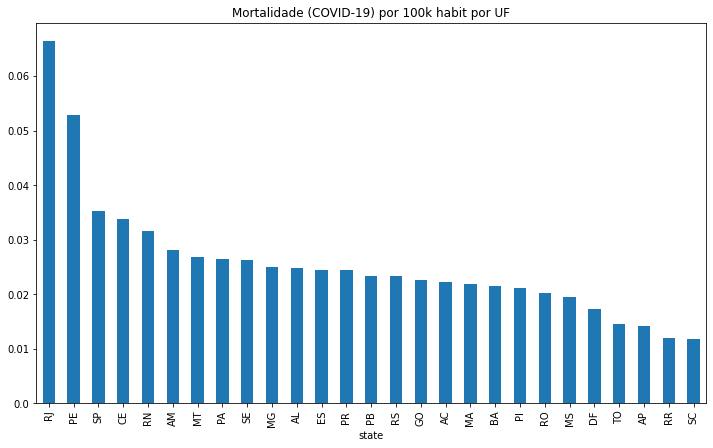

In [ ]:
fig = plt.figure()

df_states_current = df_states_current.sort_values('death_rate_per_100k_inhabitants',ascending = False)
df_states_current['death_rate_per_100k_inhabitants'].plot(kind='bar',figsize=(12,7)).yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,}'))

plt.title('Mortalidade (COVID-19) por 100k habit por UF')
display()

## Por Cidade de SP

  Analisando as cidades do Estado de São Paulo, temos a cidade de São Paulo com os maiores valores de Confirmados e Mortes, como esperado, porém vemos que na métrica de Confirmados por 100k hab, a cidade mesmo continuando em 1º, está parelha de São José do Rio Preto, e se considerarmos a Mortalidade por 100k hab, a cidade de SP está em 12ª posição.

  Logo, a mortalidade por 100k hab vistos anteriormente do Estado de São Paulo são puxados principalmente por outras cidades. São Paulo ter um número elevado de confirmados por 100k hab, mas um índice mais baixo de mortalidade por 100k hab da índicios que a qualidade do atendimento é melhor nos casos de COVID-19. 

  Outro fator que pode ser relevante é o da exposição das pessoas ao vírus, pois se for um contagio decorrente de baixa exposição, a carga viral tende a ser menor no organismo, o que tende a levar a sintomas menos severos, aumentando a chance de recuperação.

  Fatores como políticas públicas e distanciamento social podem ajudar neste índice de mortalidade por 100k hab.

In [ ]:
df_cities_current_sp = df_cities_current.copy()
df_cities_current_sp = df_cities_current_sp[df_cities_current_sp['state']=='SP']
df_cities_current_sp = df_cities_current_sp.sort_values('confirmed',ascending = False)

df_cities_current_sp = df_cities_current_sp[(df_cities_current_sp['estimated_population']>250000.0)]
df_cities_current_sp = df_cities_current_sp.drop_duplicates(keep='first')
df_cities_current_sp.head()

,date,state,city_col,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,week_number,deaths_per_100k_inhabitants,death_rate_per_100k_inhabitants,region
city,,,,,,,,,,,,,,,,,
São Paulo,2020-11-05,SP,São Paulo,city,319156,13715,237,True,12252023.0,12325232.0,3550308.0,2589.45227,0.0430,45,111.275796,0.042973,SE
Campinas,2020-11-05,SP,Campinas,city,34173,1333,218,True,1204073.0,1213792.0,3509502.0,2815.39176,0.0390,45,109.821123,0.039007,SE
São Bernardo do Campo,2020-11-05,SP,São Bernardo do Campo,city,27005,991,220,True,838936.0,844483.0,3548708.0,3197.81452,0.0367,45,117.349905,0.036697,SE
São José do Rio Preto,2020-11-05,SP,São José do Rio Preto,city,26265,725,218,True,460671.0,464983.0,3549805.0,5648.59360,0.0276,45,155.919679,0.027603,SE
Ribeirão Preto,2020-11-05,SP,Ribeirão Preto,city,25235,863,214,True,703293.0,711825.0,3543402.0,3545.11291,0.0342,45,121.237664,0.034199,SE


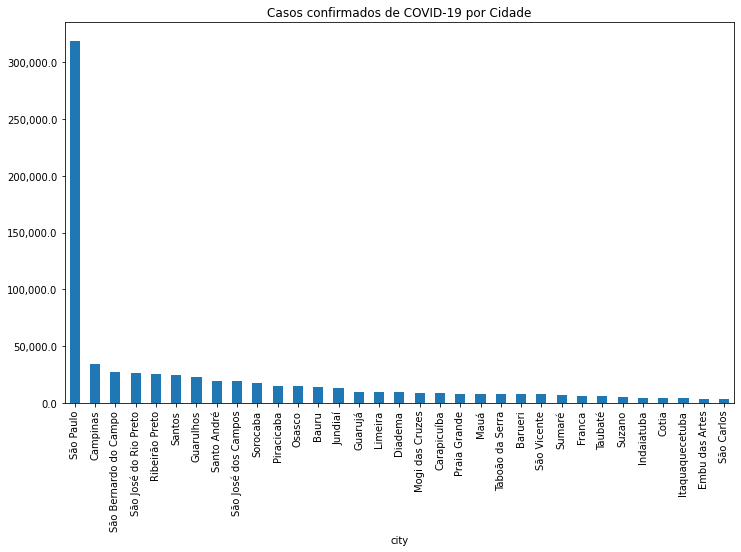

In [ ]:
fig = plt.figure()

ax = df_cities_current_sp['confirmed'].plot(kind='bar',figsize=(12,7)).yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,}'))

plt.title('Casos confirmados de COVID-19 por Cidade')
plt.show()

In [ ]:
df_cities_current_sp = df_cities_current.copy()
df_cities_current_sp = df_cities_current_sp[df_cities_current_sp['state']=='SP']
df_cities_current_sp = df_cities_current_sp.sort_values('deaths',ascending = False)

df_cities_current_sp = df_cities_current_sp[(df_cities_current_sp['estimated_population']>250000.0)]
df_cities_current_sp = df_cities_current_sp.drop_duplicates(keep='first')
df_cities_current_sp.head()

,date,state,city_col,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,week_number,deaths_per_100k_inhabitants,death_rate_per_100k_inhabitants,region
city,,,,,,,,,,,,,,,,,
São Paulo,2020-11-05,SP,São Paulo,city,319156,13715,237,True,12252023.0,12325232.0,3550308.0,2589.45227,0.0430,45,111.275796,0.042973,SE
Guarulhos,2020-11-05,SP,Guarulhos,city,22848,1546,219,True,1379182.0,1392121.0,3518800.0,1641.23665,0.0677,45,111.053565,0.067665,SE
Campinas,2020-11-05,SP,Campinas,city,34173,1333,218,True,1204073.0,1213792.0,3509502.0,2815.39176,0.0390,45,109.821123,0.039007,SE
São Bernardo do Campo,2020-11-05,SP,São Bernardo do Campo,city,27005,991,220,True,838936.0,844483.0,3548708.0,3197.81452,0.0367,45,117.349905,0.036697,SE
Ribeirão Preto,2020-11-05,SP,Ribeirão Preto,city,25235,863,214,True,703293.0,711825.0,3543402.0,3545.11291,0.0342,45,121.237664,0.034199,SE


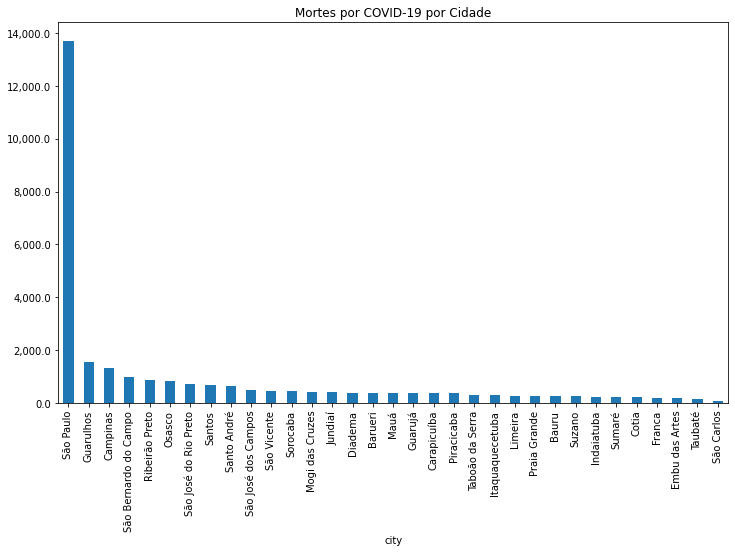

In [ ]:
fig = plt.figure()

df_cities_current_sp = df_cities_current_sp.sort_values('deaths',ascending = False)
df_cities_current_sp['deaths'].plot(kind='bar',figsize=(12,7)).yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,}'))

plt.title('Mortes por COVID-19 por Cidade')
display()

In [ ]:
df_cities_current_sp = df_cities_current.copy()
df_cities_current_sp = df_cities_current_sp[df_cities_current_sp['state']=='SP']
df_cities_current_sp = df_cities_current_sp.sort_values('confirmed_per_100k_inhabitants',ascending = False)

df_cities_current_sp = df_cities_current_sp[(df_cities_current_sp['estimated_population']>250000.0)]
df_cities_current_sp = df_cities_current_sp.drop_duplicates(keep='first')
df_cities_current_sp.head()

,date,state,city_col,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,week_number,deaths_per_100k_inhabitants,death_rate_per_100k_inhabitants,region
city,,,,,,,,,,,,,,,,,
Santos,2020-11-05,SP,Santos,city,24727,695,212,True,433311.0,433656.0,3548500.0,5701.98498,0.0281,45,160.265279,0.028107,SE
São José do Rio Preto,2020-11-05,SP,São José do Rio Preto,city,26265,725,218,True,460671.0,464983.0,3549805.0,5648.59360,0.0276,45,155.919679,0.027603,SE
Bauru,2020-11-05,SP,Bauru,city,14063,250,211,True,376818.0,379297.0,3506003.0,3707.64862,0.0178,45,65.911410,0.017777,SE
Piracicaba,2020-11-05,SP,Piracicaba,city,14868,368,212,True,404142.0,407252.0,3538709.0,3650.81080,0.0248,45,90.361742,0.024751,SE
Ribeirão Preto,2020-11-05,SP,Ribeirão Preto,city,25235,863,214,True,703293.0,711825.0,3543402.0,3545.11291,0.0342,45,121.237664,0.034199,SE


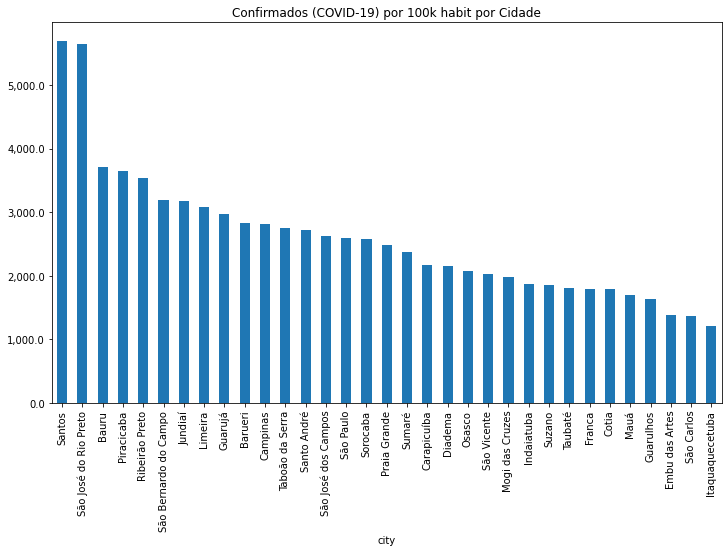

In [ ]:
fig = plt.figure()

df_cities_current_sp = df_cities_current_sp.sort_values('confirmed_per_100k_inhabitants',ascending = False)
df_cities_current_sp['confirmed_per_100k_inhabitants'].plot(kind='bar',figsize=(12,7)).yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,}'))

plt.title('Confirmados (COVID-19) por 100k habit por Cidade')
display()

In [ ]:
df_cities_current_sp = df_cities_current.copy()
df_cities_current_sp = df_cities_current_sp[df_cities_current_sp['state']=='SP']
df_cities_current_sp = df_cities_current_sp.sort_values('death_rate_per_100k_inhabitants',ascending = False)

df_cities_current_sp = df_cities_current_sp[(df_cities_current_sp['estimated_population']>250000.0)]
df_cities_current_sp = df_cities_current_sp.drop_duplicates(keep='first')
df_cities_current_sp.head(15)

,date,state,city_col,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,week_number,deaths_per_100k_inhabitants,death_rate_per_100k_inhabitants,region
city,,,,,,,,,,,,,,,,,
Guarulhos,2020-11-05,SP,Guarulhos,city,22848,1546,219,True,1379182.0,1392121.0,3518800.0,1641.23665,0.0677,45,111.053565,0.067665,SE
Itaquaquecetuba,2020-11-05,SP,Itaquaquecetuba,city,4532,301,211,True,370821.0,375011.0,3523107.0,1208.49788,0.0664,45,80.264312,0.066417,SE
São Vicente,2020-11-05,SP,São Vicente,city,7445,452,211,True,365798.0,368355.0,3551009.0,2021.14808,0.0607,45,122.707714,0.060712,SE
Osasco,2020-11-05,SP,Osasco,city,14567,840,217,True,698418.0,699944.0,3534401.0,2081.16649,0.0577,45,120.009601,0.057665,SE
Barueri,2020-11-05,SP,Barueri,city,7827,386,218,True,274182.0,276982.0,3505708.0,2825.81540,0.0493,45,139.359236,0.049316,SE
Embu das Artes,2020-11-05,SP,Embu das Artes,city,3805,186,215,True,273726.0,276535.0,3515004.0,1375.95603,0.0489,45,67.260925,0.048883,SE
Mogi das Cruzes,2020-11-05,SP,Mogi das Cruzes,city,8909,432,216,True,445842.0,450785.0,3530607.0,1976.33018,0.0485,45,95.832825,0.048490,SE
Indaiatuba,2020-11-05,SP,Indaiatuba,city,4777,228,210,True,251627.0,256223.0,3520509.0,1864.39157,0.0477,45,88.984986,0.047729,SE
Mauá,2020-11-05,SP,Mauá,city,8127,384,220,True,472912.0,477552.0,3529401.0,1701.80420,0.0472,45,80.410091,0.047250,SE


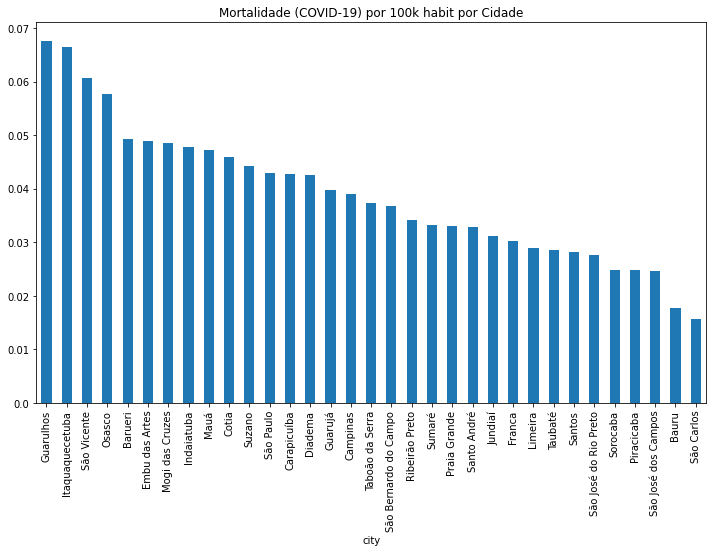

In [ ]:
fig = plt.figure()

df_cities_current_sp = df_cities_current_sp.sort_values('death_rate_per_100k_inhabitants',ascending = False)
df_cities_current_sp['death_rate_per_100k_inhabitants'].plot(kind='bar',figsize=(12,7)).yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,}'))

plt.title('Mortalidade (COVID-19) por 100k habit por Cidade')
display()

## Por Cidade com mais de 1 milhão de habitantes e 10.000 casos confirmados do Brasil

Comparando a cidade de São Paulo com outras cidades do Brasil, que tenham mais de 1 milhão de habitantes e mais de 10 mil casos confirmados, para tentar fazer um recorte mais similar ao da cidade de São Paulo, vemos que se repete a liderança de SP em relação a números absolutos de confirmados e mortes.

Porém, novamente podemos ver como a mortalidade por 100k hab é menor que as outras cidades, estando em 5º lugar. E quanto aos confirmados por 100k hab, encontra-se em 7º lugar.

In [ ]:
df_cities_current = df_cities_current.sort_values('confirmed',ascending = False)
top_cities = df_cities_current[(df_cities_current['estimated_population']>1000000.0) & (df_cities_current['confirmed']>10000)]['city_col'][:10]
top_cities = top_cities.to_list()
top_cities = top_cities + ['São Paulo']

df_cities_current = df_cities_current[(df_cities_current['estimated_population']>1000000.0) & (df_cities_current['confirmed']>10000) & (df_cities_current['city_col'].isin(top_cities))]
df_cities_current = df_cities_current.drop_duplicates(keep='first')

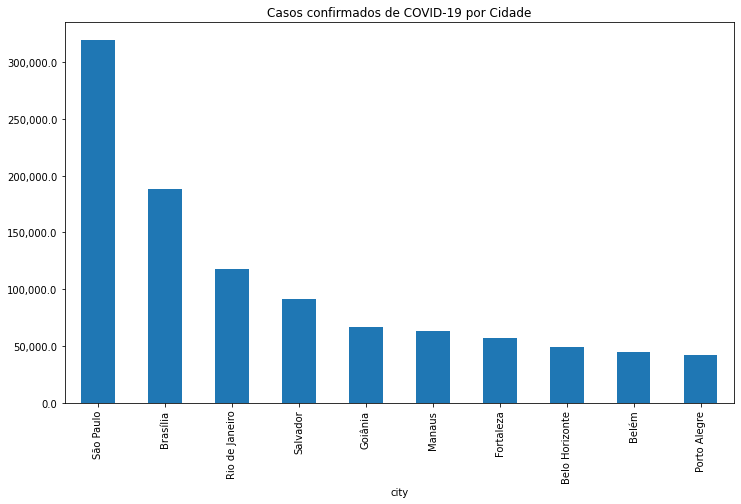

In [ ]:
fig = plt.figure()

ax = df_cities_current['confirmed'].plot(kind='bar',figsize=(12,7)).yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,}'))

plt.title('Casos confirmados de COVID-19 por Cidade')
plt.show()

In [ ]:
df_cities_current = df_cities_current.sort_values('deaths',ascending = False)
top_cities = df_cities_current[(df_cities_current['estimated_population']>1000000.0) & (df_cities_current['confirmed']>10000)]['city_col'][:10]
top_cities = top_cities.to_list()
top_cities = top_cities + ['São Paulo']

df_cities_current = df_cities_current[(df_cities_current['estimated_population']>1000000.0) & (df_cities_current['confirmed']>10000) & (df_cities_current['city_col'].isin(top_cities))]
df_cities_current = df_cities_current.drop_duplicates(keep='first')

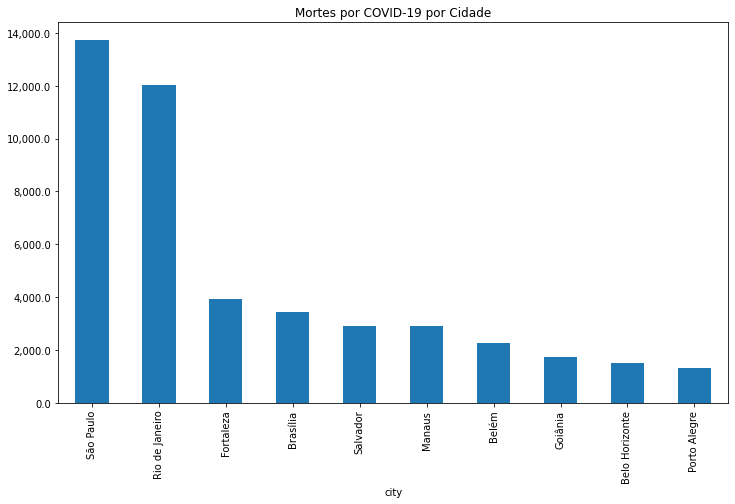

In [ ]:
fig = plt.figure()

df_cities_current = df_cities_current.sort_values('deaths',ascending = False)
df_cities_current['deaths'].plot(kind='bar',figsize=(12,7)).yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,}'))

plt.title('Mortes por COVID-19 por Cidade')
display()

In [ ]:
df_cities_current = df_cities_current.sort_values('confirmed_per_100k_inhabitants',ascending = False)
top_cities = df_cities_current[(df_cities_current['estimated_population']>1000000.0) & (df_cities_current['confirmed']>10000)]['city_col'][:10]
top_cities = top_cities.to_list()
top_cities = top_cities + ['São Paulo']

df_cities_current = df_cities_current[(df_cities_current['estimated_population']>1000000.0) & (df_cities_current['confirmed']>10000) & (df_cities_current['city_col'].isin(top_cities))]
df_cities_current = df_cities_current.drop_duplicates(keep='first')

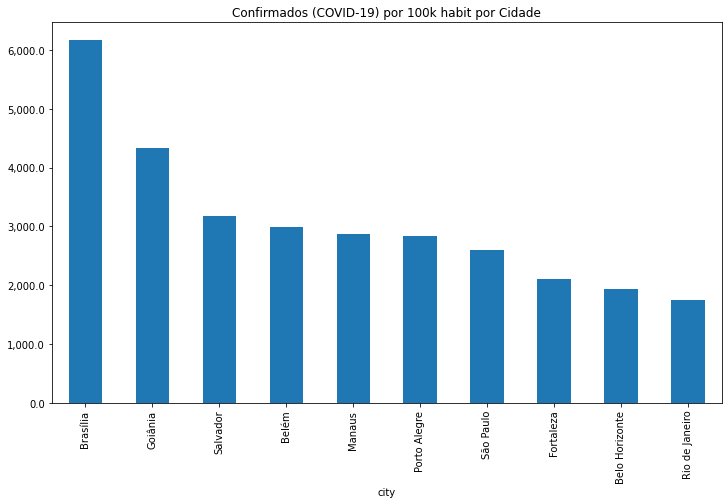

In [ ]:
fig = plt.figure()

df_cities_current = df_cities_current.sort_values('confirmed_per_100k_inhabitants',ascending = False)
df_cities_current['confirmed_per_100k_inhabitants'].plot(kind='bar',figsize=(12,7)).yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,}'))

plt.title('Confirmados (COVID-19) por 100k habit por Cidade')
display()

In [ ]:
df_cities_current = df_cities_current.sort_values('death_rate_per_100k_inhabitants',ascending = False)
top_cities = df_cities_current[(df_cities_current['estimated_population']>1000000.0) & (df_cities_current['confirmed']>10000)]['city_col'][:10]
top_cities = top_cities.to_list()
top_cities = top_cities + ['São Paulo']

df_cities_current = df_cities_current[(df_cities_current['estimated_population']>1000000.0) & (df_cities_current['confirmed']>10000) & (df_cities_current['city_col'].isin(top_cities))]
df_cities_current = df_cities_current.drop_duplicates(keep='first')

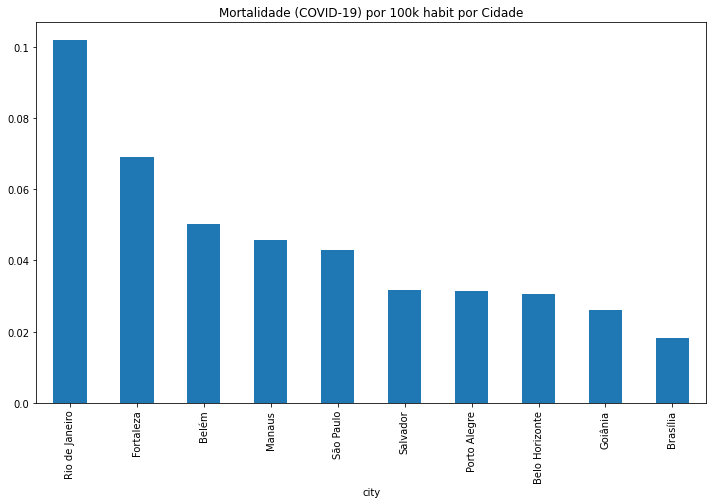

In [ ]:
fig = plt.figure()

df_cities_current = df_cities_current.sort_values('death_rate_per_100k_inhabitants',ascending = False)
df_cities_current['death_rate_per_100k_inhabitants'].plot(kind='bar',figsize=(12,7)).yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,}'))

plt.title('Mortalidade (COVID-19) por 100k habit por Cidade')
display()

## Análise histórica das 5 cidades com maior número de casos

Analisando temporalmente as 5 cidades,que tem mais de 1 milhão de habitantes e mais de 10 mil casos confirmados, com maior taxa de mortalidade por 100k habitantes, podemos ver que o surto começou em São Paulo, porém a cidade conseguiu se estabilizar em um plateau abaixo das outras cidades, com destaque para o Rio de Janeiro, com uma taxa de mortalide por 100k habitantes maior que o dobro da de São Paulo.

In [ ]:
# removida a cidade de Belém por ter um comportamente de outlier, provavelmente decorrente de um registro errado de dados [seria a posição top_confirmed_ct[2]]

top_confirmed_ct = df_cities_current[:6]['city_col']
top_confirmed_ct = top_confirmed_ct.to_list()
top_confirmed_ct_0 = top_confirmed_ct[0]
top_confirmed_ct_1 = top_confirmed_ct[1]
top_confirmed_ct_2 = top_confirmed_ct[3]
top_confirmed_ct_3 = top_confirmed_ct[4]
top_confirmed_ct_4 = top_confirmed_ct[5]

df_top_5_ct = df.copy()
df_top_5_ct = df_top_5_ct.loc[((df_top_5_ct['city'] == top_confirmed_ct_0) | (df_top_5_ct['city'] == top_confirmed_ct_1) | (df_top_5_ct['city'] == top_confirmed_ct_2)| (df_top_5_ct['city'] == top_confirmed_ct_3) | (df_top_5_ct['city'] == top_confirmed_ct_4)) & (df_top_5_ct['place_type'] == 'city')]
df_top_5_ct.index = df_top_5_ct.week_number
df_top_5_ct = df_top_5_ct.sort_index().sort_values(['date','city'])
df_top_5_ct = df_top_5_ct.drop(columns=['order_for_place','is_last','estimated_population_2019','estimated_population','city_ibge_code','place_type','week_number'])
df_top_5_ct = df_top_5_ct.groupby(['week_number','city']).max([['confirmed','deaths','confirmed_per_100k_inhabitants','death_rate_per_100k_inhabitants','date']])
df_top_5_ct = df_top_5_ct.reset_index(level=[1])
df_top_5_ct['death_rate_per_100k_inhabitants'] = round(df_top_5_ct['death_rate_per_100k_inhabitants'],3)

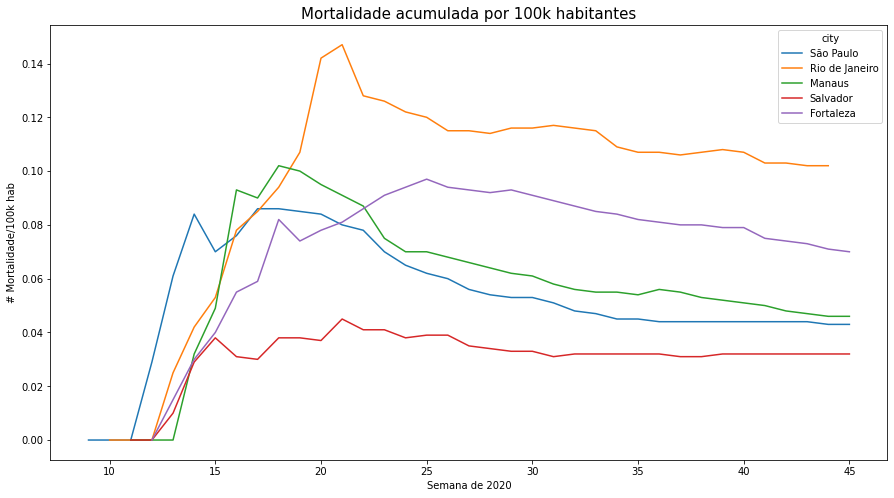

In [ ]:
plt.figure(figsize=(15,8))
c = sns.lineplot(data=df_top_5_ct, x=df_top_5_ct.index, y="death_rate_per_100k_inhabitants", hue="city")

c.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
c.axes.set_title("Mortalidade acumulada por 100k habitantes",fontsize=15)
c.set_xlabel("Semana de 2020",fontsize=10)
c.set_ylabel("# Mortalidade/100k hab",fontsize=10)
c.tick_params(labelsize=10)
plt.setp(c.get_legend().get_texts(), fontsize='10') # for legend text
plt.setp(c.get_legend().get_title(), fontsize='10') # for legend title
display()